# Crime data from 2010

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls data/2010

apr10.xls*  dec10.xls*  jan10.xls*  jun10.xls*  may10.xls*  oct10.xls*
aug10.xls*  feb10.xls*  jul10.xls*  mar10.xls*  nov10.xls*  sep10.xls*


In [3]:
path = 'data/2010'

In [4]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

WARNING *** file size (2752234) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [5]:
df.head()

,# Of Offenses,Beat,Block Range,Date,Field11,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,1.0,13D20,6600-6699,2010-04-17,NaN,0.0,Murder,05W,HEFFERNAN,-,-,NaN
1,1.0,11H40,10100-10199,2010-04-08,NaN,20.0,Murder,20R,LUCORE,-,-,NaN
2,2.0,19G20,11400-11499,2010-04-01,NaN,22.0,Murder,13R,CARVEL,-,LN,NaN
3,1.0,10H60,3700-3799,2010-04-17,NaN,1.0,Murder,13R,WHEELER,-,-,NaN
4,1.0,14D30,5100-5199,2010-04-08,NaN,23.0,Murder,20R,MYRTLEWOOD,-,DR,NaN


In [6]:
# get premise codes

pc = pd.read_csv('data/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [7]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.head()

,Premise,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

# Of Offenses         1
Beat                  1
Block Range           1
Date                  1
Field11          136263
Hour                  1
Offense Type          1
Premise               1
Street Name           1
Suffix                1
Type                  1
Unnamed: 1       136263
dtype: int64

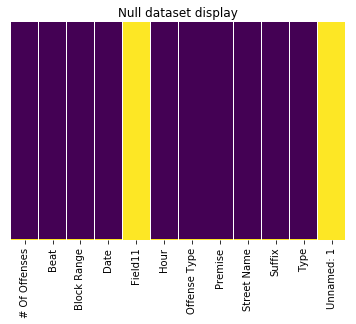

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Cleanup

- joining similar columns
- renaming

In [10]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136263 entries, 0 to 136262
Data columns (total 12 columns):
NumOffenses    136262 non-null float64
Beat           136262 non-null object
BlockRange     136262 non-null object
Date           136262 non-null datetime64[ns]
Field11        0 non-null float64
Hour           136262 non-null float64
OffenseType    136262 non-null object
Premise        136262 non-null object
StreetName     136262 non-null object
Suffix         136262 non-null object
Type           136262 non-null object
Unnamed: 1     0 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 12.5+ MB


In [11]:
df.apply(lambda x: sum(x.isnull()))

NumOffenses         1
Beat                1
BlockRange          1
Date                1
Field11        136263
Hour                1
OffenseType         1
Premise             1
StreetName          1
Suffix              1
Type                1
Unnamed: 1     136263
dtype: int64

## Subset dataframe to work on 

In [12]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136263 entries, 0 to 136262
Data columns (total 8 columns):
Date           136262 non-null datetime64[ns]
Beat           136262 non-null object
BlockRange     136262 non-null object
StreetName     136262 non-null object
OffenseType    136262 non-null object
Premise        136262 non-null object
NumOffenses    136262 non-null float64
Hour           136262 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 8.3+ MB


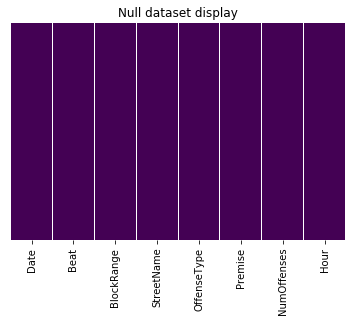

In [13]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Join datafames
 join premise df with crime to extract num values

In [14]:
crimes.Premise.value_counts(dropna=False)[:10]

20A    17848
20R    17426
18A    15614
13R    10029
20D     9793
080     6821
18O     6263
250     4690
18R     4009
18P     3405
Name: Premise, dtype: int64

In [15]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136264 entries, 0 to 136263
Data columns (total 9 columns):
Date                   136262 non-null datetime64[ns]
Beat                   136262 non-null object
BlockRange             136262 non-null object
StreetName             136262 non-null object
OffenseType            136262 non-null object
Premise                136263 non-null object
NumOffenses            136262 non-null float64
Hour                   136262 non-null float64
Premise Description    136214 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 10.4+ MB


In [16]:
crimes[['Premise', 'Premise Description']].head(20)

,Premise,Premise Description
0,05W,WAREHOUSE
1,05W,WAREHOUSE
2,05W,WAREHOUSE
3,05W,WAREHOUSE
4,05W,WAREHOUSE
5,05W,WAREHOUSE
6,05W,WAREHOUSE
7,05W,WAREHOUSE
8,05W,WAREHOUSE
9,05W,WAREHOUSE


In [17]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2010-04-17,13D20,6600-6699,HEFFERNAN,Murder,05W,1.0,0.0,WAREHOUSE
1,2010-04-01,14D20,3400-3499,CORDER,Burglary,05W,1.0,0.0,WAREHOUSE
2,2010-04-08,6B40,10200-10299,NORTH,Burglary,05W,1.0,23.0,WAREHOUSE
3,2010-04-23,13D10,6100-6199,SOUTH LP E,Burglary,05W,1.0,19.0,WAREHOUSE
4,2010-04-06,3B10,5900-5999,CENTRALCREST,Burglary,05W,1.0,17.0,WAREHOUSE


In [18]:
crimes.apply(lambda x: sum(x.isnull()))

Date                    2
Beat                    2
BlockRange              2
StreetName              2
OffenseType             2
Premise                 1
NumOffenses             2
Hour                    2
Premise Description    50
dtype: int64

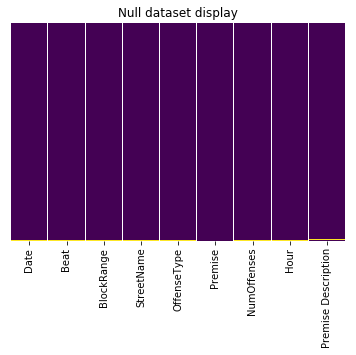

In [19]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [20]:
crimes[crimes['Premise'] == '---'].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
135899,2010-04-29,18F50,3200-3299,GESSNER,Theft,---,1.0,21.0,NaN
135900,2010-07-29,19G10,8800-8899,BOONE,Rape,---,1.0,18.0,NaN
135901,2010-08-18,20G10,10000-10099,WESTPARK,Aggravated Assault,---,1.0,18.0,NaN
135902,2010-08-23,16E30,5100-5199,KELLING,Aggravated Assault,---,1.0,8.0,NaN
135903,2007-02-05,1A30,2400-2499,RICHMOND,Auto Theft,---,1.0,8.0,NaN


In [21]:
len(crimes[crimes['Premise'] == '---'])

45

In [22]:
len(crimes[crimes['Premise'] == 'N'])

0

In [23]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [24]:
len(crimes[crimes['Premise Description'].isnull()])

1

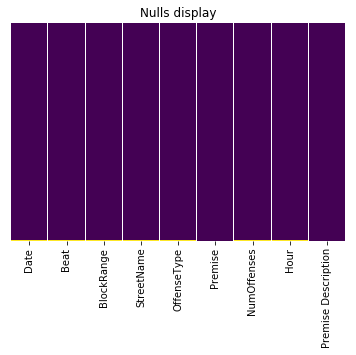

In [25]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

In [26]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   2
Beat                   2
BlockRange             2
StreetName             2
OffenseType            2
Premise                1
NumOffenses            2
Hour                   2
Premise Description    1
dtype: int64

## drop rows with 2 or 3 missing values

In [27]:
#crimes = crimes.dropna(thresh=3)
crimes = crimes.dropna(subset=['Date'])

In [28]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

In [29]:
crimes = crimes.dropna(thresh=3)

In [30]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

# FIND NAN

## Find NaN
- drop if > 2 nan

In [31]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

In [32]:
crimes[crimes.isnull().any(axis=1)].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description


## Problem
- find nan values and fix

In [33]:
null_premise = crimes.Premise.isnull()

In [34]:
crimes['Premise'] = crimes["Premise"].fillna('none')
crimes['Premise Description'] = crimes["Premise Description"].fillna('none')

In [35]:
crimes.apply(lambda x: sum(x.isnull()))

Date                   0
Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
dtype: int64

## Inspect each column

In [36]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Beat column
- total beats should be around 120

In [37]:
len(crimes.Beat.value_counts())

122

In [38]:
len(crimes.Beat.value_counts(dropna=False))

122

In [39]:
crimes.Beat.unique()[:10]

array(['13D20', '14D20', '6B40', '13D10', '3B10', '10H10', '3B30',
       '15E40', '3B50', '9C20'], dtype=object)

In [40]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [41]:
len(crimes.Beat.value_counts(dropna=False))

122

In [42]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [43]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

122

In [44]:
crimes.Beat.unique()

array(['13D20', '14D20', '6B40', '13D10', '3B10', '10H10', '3B30',
       '15E40', '3B50', '9C20', '10H70', '5F30', '9C10', '3B40', '4F30',
       '14D10', '5F20', '13D30', '7C10', '6B30', '10H30', '14D50', '6B20',
       '18F50', '2A60', '11H10', '19G50', '9C30', '7C20', '16E10',
       '11H50', '10H20', '2A40', '20G10', '6B60', '11H20', '14D30',
       '18F30', '20G30', '8C40', '13D40', '2A30', '18F10', '15E30',
       '16E30', '2A20', '7C50', '7C30', '17E20', '2A10', '17E30', '16E20',
       '15E20', '1A50', '5F10', '14D40', '4F20', '2A50', '19G40', '5F40',
       '18F60', '20G40', '17E10', '10H50', '20G50', '8C20', '20G70',
       '20G60', '7C40', '8C10', '6B10', '4F10', '18F40', '15E10', '12D40',
       '11H40', '19G30', '16E40', 'UNK', '9C40', '12D10', '8C60', '10H80',
       '8C50', '18F20', '17E40', '1A20', '24C10', '8C30', '11H30',
       '24C40', '12D50', '10H60', '12D20', '24C30', '12D70', '20G20',
       '20G80', '19G10', '19G20', '10H40', '6B50', '12D60', '1A30',
       '2

In [45]:
crimes.Beat.value_counts(dropna=False).head()

19G10    3010
12D10    2889
6B60     2732
3B10     2702
1A20     2612
Name: Beat, dtype: int64

## BlockRange

In [46]:
len(crimes.BlockRange.value_counts(dropna=False))

249

In [47]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      2079
7900-7999    1741
100-199      1734
800-899      1679
9400-9499    1669
Name: BlockRange, dtype: int64

In [48]:
# strip
crimes.BlockRange =crimes.BlockRange.str.strip()

In [49]:
len(crimes.BlockRange.value_counts(dropna=False))

249

## StreetName

In [50]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7832


In [51]:
# remove extra spaces
crimes.StreetName = crimes.StreetName.str.strip()


# make all lower case
crimes.StreetName = crimes.StreetName.str.lower()

In [52]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7832


In [53]:
print(crimes.StreetName.value_counts(dropna=False).head())

westheimer    3716
gessner       2226
gulf          1931
richmond      1683
southwest     1515
Name: StreetName, dtype: int64


## OffenseType
Total 7
- Theft
- Burlary
- Aggravated Assalult
- Robbery
- Auto Theft
- Rape
- Murder


In [54]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [55]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [56]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [57]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 74581
Burglary              27924
Auto Theft            12424
Aggravated Assault    10915
Robbery                9449
Rape                    709
Murder                  260
Name: OffenseType, dtype: int64


In [58]:
# join Auto Theft & AutoTheft
crimes.OffenseType = crimes.OffenseType.replace('AutoTheft','Auto Theft')

#### fill nans with most common value

In [59]:
crimes = crimes.fillna(crimes['OffenseType'].value_counts().index[0])

In [60]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 74581
Burglary              27924
Auto Theft            12424
Aggravated Assault    10915
Robbery                9449
Rape                    709
Murder                  260
Name: OffenseType, dtype: int64


## Premise

In [61]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

crimes['Premise Description'] = crimes['Premise Description'].str.strip()

crimes['Premise Description'] = crimes['Premise Description'].str.lower()

before:128


In [62]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:128


In [63]:
crimes['Premise Description'].value_counts(dropna=False).head()

apartment                17848
residence/house          17426
apartment parking lot    15614
road/street/sidewalk     10029
driveway                  9793
Name: Premise Description, dtype: int64

# Date column

In [64]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Date
- make datetime index

In [65]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [66]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1959-06-06,18F20,5100-5199,richmond,Theft,080,1.0,14.0,department/discount store
1966-01-01,10H50,3300-3399,alabama,Rape,20A,1.0,0.0,apartment
1966-07-18,13D40,10200-10299,telephone,Auto Theft,18A,1.0,13.0,apartment parking lot
1969-07-22,2A30,1500-1599,nicholson,Theft,20R,1.0,0.0,residence/house
1969-11-26,3B50,7100-7199,irvington,Theft,13R,1.0,15.0,road/street/sidewalk


## Create Columns with day,weekday,month,year from datetime index

It allows us to view incorect reports by date better

In [67]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [68]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1959-06-06,18F20,5100-5199,richmond,Theft,080,1.0,14.0,department/discount store,06,Saturday,Jun,1959
1966-01-01,10H50,3300-3399,alabama,Rape,20A,1.0,0.0,apartment,01,Saturday,Jan,1966
1966-07-18,13D40,10200-10299,telephone,Auto Theft,18A,1.0,13.0,apartment parking lot,18,Monday,Jul,1966
1969-07-22,2A30,1500-1599,nicholson,Theft,20R,1.0,0.0,residence/house,22,Tuesday,Jul,1969
1969-11-26,3B50,7100-7199,irvington,Theft,13R,1.0,15.0,road/street/sidewalk,26,Wednesday,Nov,1969


In [69]:
crimes.year.value_counts(dropna=False)

2010    134543
2009      1486
2008        68
2007        30
2001        29
2006        21
2005        19
2004        14
2000        12
2003         9
2002         7
1995         3
1990         2
2011         2
1980         2
1974         2
1966         2
1983         2
1969         2
1985         1
1977         1
1991         1
1998         1
1959         1
1999         1
1996         1
Name: year, dtype: int64

We can see now that many reports have incorect year

## null values

- check
- count
- display

In [70]:
crimes.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

In [71]:
# display any null
len(crimes[crimes.isnull().any(axis=1)])

0

In [72]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,


In [73]:
crimes.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise                0
NumOffenses            0
Hour                   0
Premise Description    0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

## New Dataframe
- remove premise col
- keep premise description

In [74]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1959-06-06,18F20,5100-5199,richmond,Theft,department/discount store,1.0,14.0,06,Saturday,Jun,1959
1966-01-01,10H50,3300-3399,alabama,Rape,apartment,1.0,0.0,01,Saturday,Jan,1966
1966-07-18,13D40,10200-10299,telephone,Auto Theft,apartment parking lot,1.0,13.0,18,Monday,Jul,1966
1969-07-22,2A30,1500-1599,nicholson,Theft,residence/house,1.0,0.0,22,Tuesday,Jul,1969
1969-11-26,3B50,7100-7199,irvington,Theft,road/street/sidewalk,1.0,15.0,26,Wednesday,Nov,1969


In [75]:
crime_yr.apply(lambda x: sum(x.isnull()))

Beat                   0
BlockRange             0
StreetName             0
OffenseType            0
Premise Description    0
NumOffenses            0
Hour                   0
day                    0
weekday                0
month                  0
year                   0
dtype: int64

In [76]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)


In [77]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1959-06-06,18F20,5100-5199,richmond,Theft,department/discount store,1.0,14.0,06,Saturday,Jun,1959
1966-01-01,10H50,3300-3399,alabama,Rape,apartment,1.0,0.0,01,Saturday,Jan,1966
1966-07-18,13D40,10200-10299,telephone,Auto Theft,apartment parking lot,1.0,13.0,18,Monday,Jul,1966
1969-07-22,2A30,1500-1599,nicholson,Theft,residence/house,1.0,0.0,22,Tuesday,Jul,1969
1969-11-26,3B50,7100-7199,irvington,Theft,road/street/sidewalk,1.0,15.0,26,Wednesday,Nov,1969


## Save

In [78]:
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136262 entries, 1959-06-06 to 2011-01-06
Data columns (total 11 columns):
Beat           136262 non-null object
BlockRange     136262 non-null object
StreetName     136262 non-null object
OffenseType    136262 non-null object
Premise        136262 non-null object
NumOffenses    136262 non-null float64
Hour           136262 non-null float64
day            136262 non-null object
weekday        136262 non-null object
month          136262 non-null object
year           136262 non-null object
dtypes: float64(2), object(9)
memory usage: 12.5+ MB


In [79]:
crime_yr.to_csv('data/clean/crime10_clean.csv')

In [80]:
ls data/clean

crime10_clean.csv*  crime12_clean.csv*  crime14_clean.csv*  crime16_clean.csv*
crime11_clean.csv*  crime13_clean.csv*  crime15_clean.csv*  crime17_clean.csv*
